In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
import pathlib

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos',                         untar=True)


228813984/228813984 [==============================] - 1s 0us/step


In [5]:
data_dir = pathlib.Path(data_dir).with_suffix('')

In [6]:
print(data_dir)

/root/.keras/datasets/flower_photos


In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [9]:
import glob

# Récupérer la liste des chemins d'accès vers les images
image_paths = glob.glob(str(data_dir / "*/*.jpg"))


In [10]:
# Sélectionner un chemin d'accès aléatoire
random_image_path = np.random.choice(image_paths)


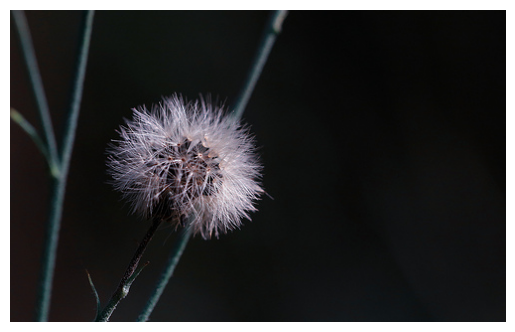

In [11]:
# Charger l'image
image = plt.imread(random_image_path)

# Afficher l'image
plt.imshow(image)
plt.axis('off')  # Masquer les axes
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [13]:
# Charger les images à partir du répertoire avec la taille d'origine
image_dataset = image_dataset_from_directory(
    data_dir,
    label_mode="categorical",  # Utilisez "categorical" si vous avez des catégories
    batch_size=32  # Définir la taille du lot (batch size) souhaitée
)


Found 3670 files belonging to 5 classes.


In [14]:
# Accéder aux neuf premiers lots d'images et d'étiquettes
images, labels = next(iter(image_dataset.take(9)))


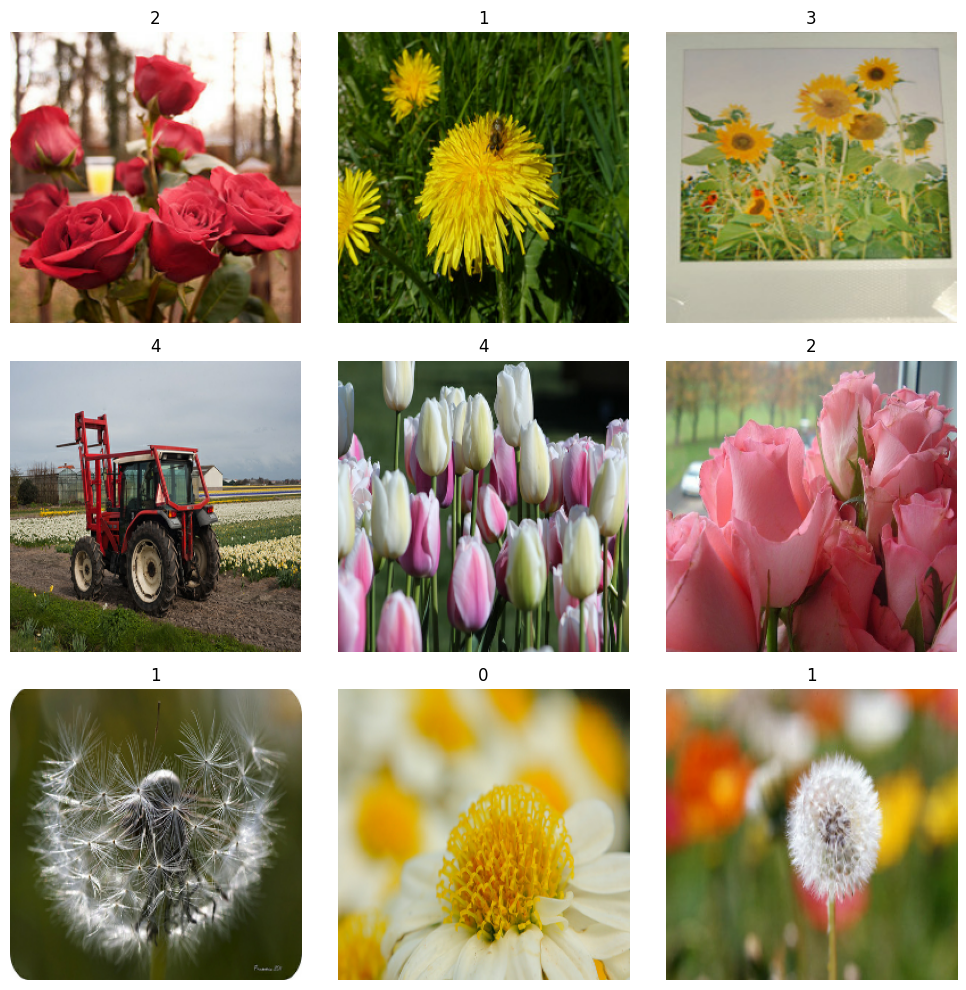

In [15]:
# Configurer la grille d'affichage
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

# Afficher les neuf images avec leurs étiquettes correspondantes
for img, lbl, ax in zip(images, labels, axes):
    ax.imshow(img.numpy().astype(np.uint8))
    ax.set_title(np.argmax(lbl))  # Utilisez np.argmax pour obtenir l'indice de la classe
    ax.axis('off')

# Afficher la grille d'images
plt.tight_layout()
plt.show()


In [16]:
batch_size=32
img_height=180
img_width=180

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

print(type(train_ds))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,

validation_split=0.2,

subset="validation",

seed=123,

image_size=(img_height, img_width),

batch_size=batch_size)







Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [19]:
train_ds, validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [20]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [21]:
import matplotlib.pyplot as plt


In [22]:
# Accéder aux neuf premiers lots d'images et d'étiquettes
images, labels = next(iter(train_ds.take(9)))


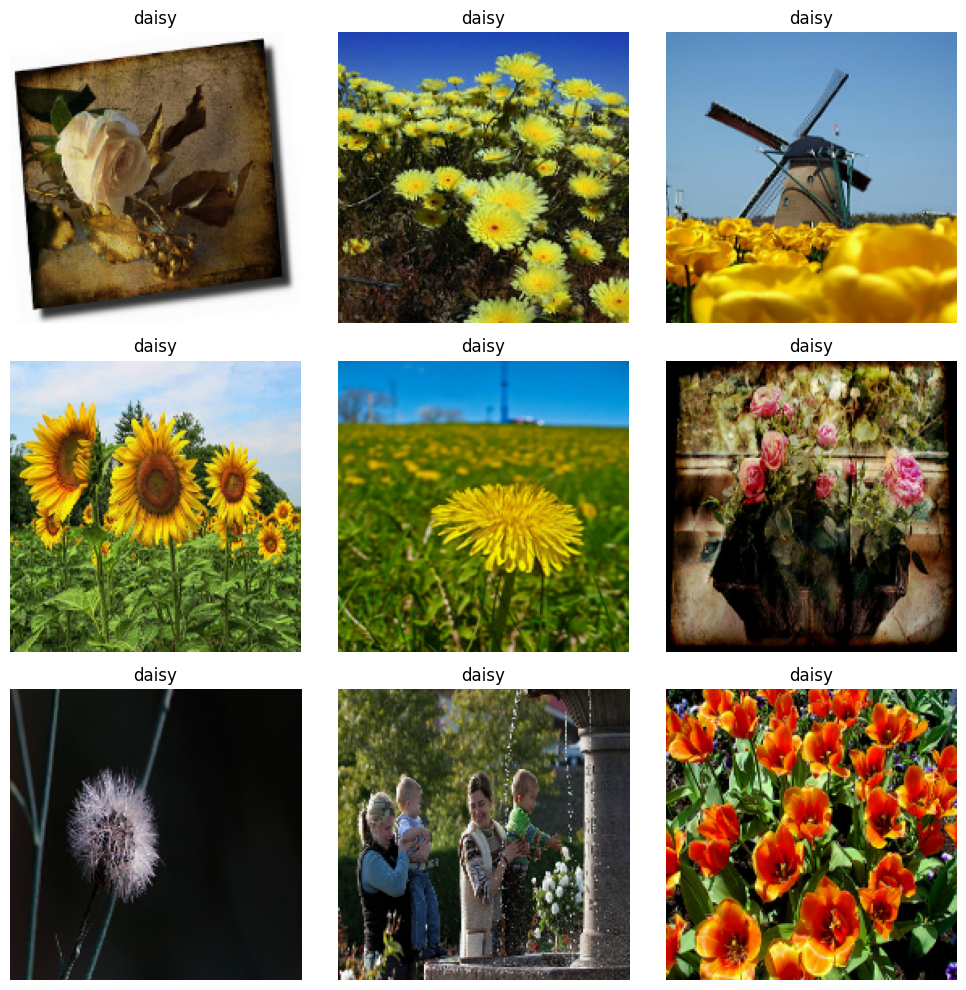

In [23]:
# Configurer la grille d'affichage
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

# Afficher les neuf images avec leurs étiquettes correspondantes
for img, lbl, ax in zip(images, labels, axes):
    ax.imshow(img.numpy().astype(np.uint8))
    ax.set_title(class_names[np.argmax(lbl)])
    ax.axis('off')

# Afficher la grille d'images
plt.tight_layout()
plt.show()


In [24]:
# Accéder aux deux premiers lots d'images et d'étiquettes
image_batch, label_batch = next(iter(train_ds.take(2)))

# Convertir les tenseurs en tableaux numpy
image_array = image_batch.numpy()
label_array = label_batch.numpy()

# Afficher la forme des deux premiers tenseurs
print("Shape du premier tenseur (images) :", image_array.shape)
print("Shape du deuxième tenseur (étiquettes) :", label_array.shape)


Shape du premier tenseur (images) : (32, 180, 180, 3)
Shape du deuxième tenseur (étiquettes) : (32,)


In [25]:
train_ds = train_ds.cache()
val_ds = val_ds.cache()


In [26]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


In [27]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

# # Définition du modèle
# model = Sequential([
#     Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#     # Autres couches du modèle
#     # ...
# ])


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
])


In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
    # Ajoutez d'autres couches dense ou de sortie si nécessaire
    # ...
])

# Compilation du modèle
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 64)       

In [39]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
92/92 [==============================] - 110s 1s/step - loss: 1.3855 - accuracy: 0.3900 - val_loss: 1.0804 - val_accuracy: 0.5490
Epoch 2/10
92/92 [==============================] - 109s 1s/step - loss: 1.0352 - accuracy: 0.5855 - val_loss: 1.0166 - val_accuracy: 0.6022
Epoch 3/10
92/92 [==============================] - 109s 1s/step - loss: 0.8542 - accuracy: 0.6775 - val_loss: 0.9920 - val_accuracy: 0.6253
Epoch 4/10
92/92 [==============================] - 108s 1s/step - loss: 0.6715 - accuracy: 0.7466 - val_loss: 1.0948 - val_accuracy: 0.5817
Epoch 5/10
92/92 [==============================] - 108s 1s/step - loss: 0.5134 - accuracy: 0.8161 - val_loss: 1.3265 - val_accuracy: 0.5490
Epoch 6/10
92/92 [==============================] - 105s 1s/step - loss: 0.4219 - accuracy: 0.8569 - val_loss: 1.2781 - val_accuracy: 0.5668
Epoch 7/10
92/92 [==============================] - 109s 1s/step - loss: 0.3683 - accuracy: 0.8627 - val_loss: 1.3203 - val_accuracy: 0.5995
Epoch 8/10
92

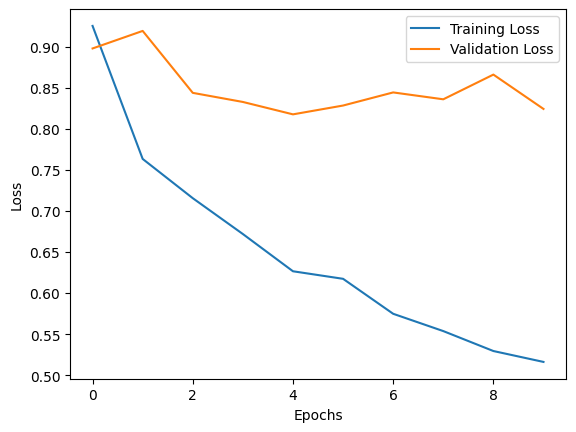

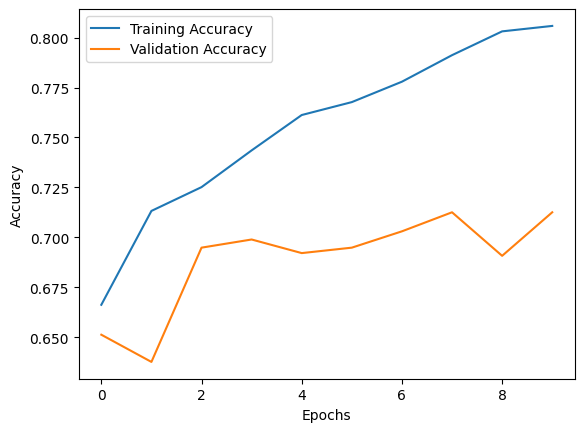

In [44]:
import matplotlib.pyplot as plt

# Récupérer l'historique de l'entraînement
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer les courbes de précision
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [41]:
from tensorflow.keras.layers import Dropout

# Ajoutez la couche de dropout après la couche de pooling
model.add(Dropout(0.5))

# Configurez l'augmentation des données
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
])

# Appliquez l'augmentation des données à l'ensemble de données d'entraînement
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Entraînez le modèle avec l'ensemble de données augmenté
history = model.fit(augmented_train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/10
92/92 [==============================] - 125s 1s/step - loss: 0.9250 - accuracy: 0.6662 - val_loss: 0.8976 - val_accuracy: 0.6512
Epoch 2/10
92/92 [==============================] - 121s 1s/step - loss: 0.7632 - accuracy: 0.7132 - val_loss: 0.9190 - val_accuracy: 0.6376
Epoch 3/10
92/92 [==============================] - 123s 1s/step - loss: 0.7155 - accuracy: 0.7251 - val_loss: 0.8436 - val_accuracy: 0.6948
Epoch 4/10
92/92 [==============================] - 124s 1s/step - loss: 0.6718 - accuracy: 0.7435 - val_loss: 0.8325 - val_accuracy: 0.6989
Epoch 5/10
92/92 [==============================] - 124s 1s/step - loss: 0.6265 - accuracy: 0.7612 - val_loss: 0.8175 - val_accuracy: 0.6921
Epoch 6/10
92/92 [==============================] - 122s 1s/step - loss: 0.6174 - accuracy: 0.7677 - val_loss: 0.8282 - val_accuracy: 0.6948
Epoch 7/10
92/92 [==============================] - 121s 1s/step - loss: 0.5748 - accuracy: 0.7779 - val_loss: 0.8441 - val_accuracy: 0.7030
Epoch 8/10
92

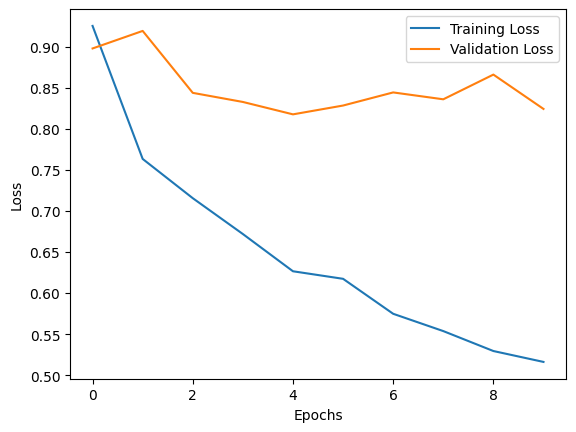

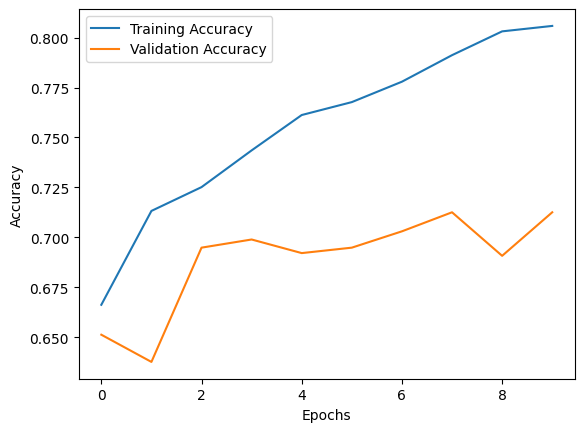

In [43]:
import matplotlib.pyplot as plt

# Récupérer l'historique de l'entraînement
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer les courbes de précision
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [45]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
])


In [46]:
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [47]:
history = model.fit(augmented_train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/10
92/92 [==============================] - 122s 1s/step - loss: 0.5172 - accuracy: 0.8099 - val_loss: 0.8513 - val_accuracy: 0.7057
Epoch 2/10
92/92 [==============================] - 120s 1s/step - loss: 0.4672 - accuracy: 0.8297 - val_loss: 0.9067 - val_accuracy: 0.7016
Epoch 3/10
92/92 [==============================] - 123s 1s/step - loss: 0.4535 - accuracy: 0.8294 - val_loss: 0.9248 - val_accuracy: 0.6989
Epoch 4/10
92/92 [==============================] - 123s 1s/step - loss: 0.4431 - accuracy: 0.8287 - val_loss: 0.8742 - val_accuracy: 0.6975
Epoch 5/10
92/92 [==============================] - 125s 1s/step - loss: 0.4289 - accuracy: 0.8338 - val_loss: 0.8940 - val_accuracy: 0.7003
Epoch 6/10
92/92 [==============================] - 124s 1s/step - loss: 0.4094 - accuracy: 0.8566 - val_loss: 0.9784 - val_accuracy: 0.7098
Epoch 7/10
92/92 [==============================] - 123s 1s/step - loss: 0.3851 - accuracy: 0.8631 - val_loss: 1.0364 - val_accuracy: 0.6826
Epoch 8/10
92

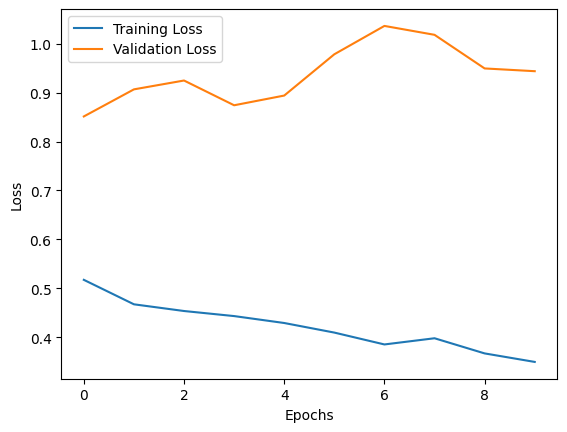

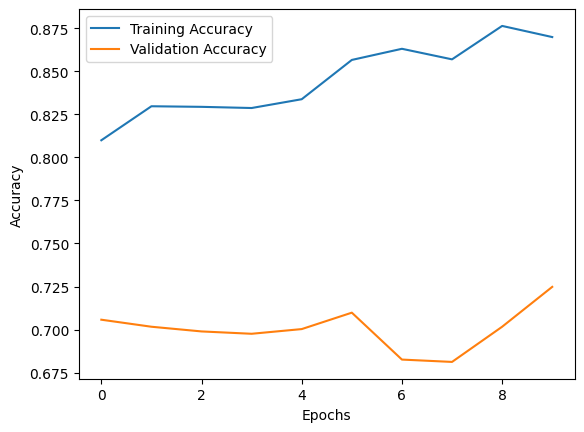

In [48]:
import matplotlib.pyplot as plt

# Récupérer l'historique de l'entraînement
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer les courbes de précision
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),  # Ajoutez la régularisation par Dropout avec un taux de dropout de votre choix
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.2),  # Ajoutez une autre couche Dropout
    Dense(128, activation='relu'),
    Dense(5)
])


In [51]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(augmented_train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/10
92/92 [==============================] - 142s 2s/step - loss: 1.3759 - accuracy: 0.4019 - val_loss: 1.1356 - val_accuracy: 0.5109
Epoch 2/10
92/92 [==============================] - 140s 2s/step - loss: 1.1069 - accuracy: 0.5276 - val_loss: 1.0232 - val_accuracy: 0.6131
Epoch 3/10
92/92 [==============================] - 139s 2s/step - loss: 0.9938 - accuracy: 0.6035 - val_loss: 0.9813 - val_accuracy: 0.5954
Epoch 4/10
92/92 [==============================] - 138s 2s/step - loss: 0.9189 - accuracy: 0.6417 - val_loss: 0.9120 - val_accuracy: 0.6444
Epoch 5/10
92/92 [==============================] - 140s 2s/step - loss: 0.8650 - accuracy: 0.6659 - val_loss: 0.8741 - val_accuracy: 0.6594
Epoch 6/10
92/92 [==============================] - 138s 2s/step - loss: 0.8173 - accuracy: 0.6880 - val_loss: 0.8469 - val_accuracy: 0.6826
Epoch 7/10
92/92 [==============================] - 137s 1s/step - loss: 0.7751 - accuracy: 0.7112 - val_loss: 0.8070 - val_accuracy: 0.6853
Epoch 8/10
92

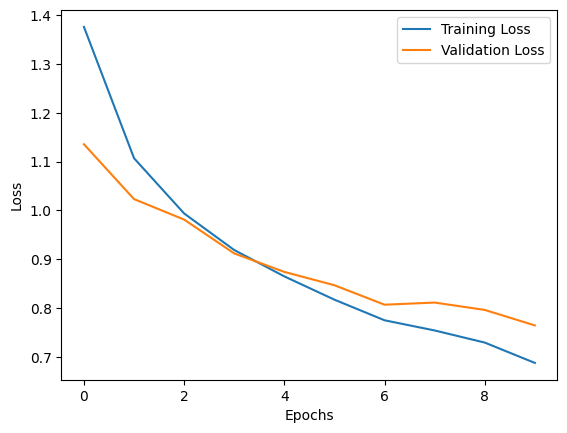

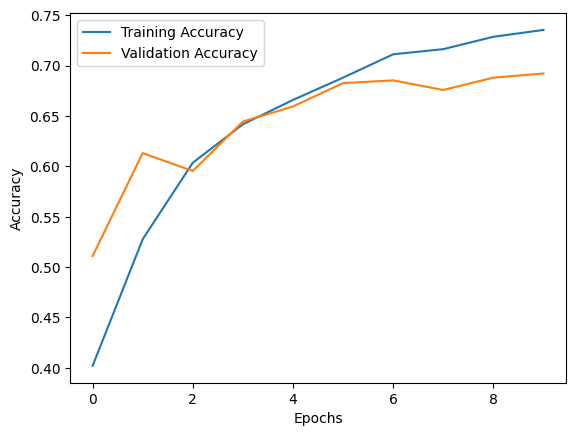

In [52]:
import matplotlib.pyplot as plt

# Récupérer l'historique de l'entraînement
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer les courbes de précision
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()